# Importing required packages for reading and loading a json file

In [1]:
!pip install rembg onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.4 MB/s eta 0:00:00


In [2]:
import json
from rembg import remove

In [3]:
# Load the json file as data
with open("/content/grouped-products.json", "r") as f:
    data = json.load(f)

In [4]:
# Extract the image urls
gold_data = []

for gold_key, gold_info in data.get("jewellery", {}).items():
    product_id = gold_info.get("product_id")
    image_link = gold_info.get("image", {}).get("link")

    if product_id and image_link:
        gold_data.append((product_id, image_link))

In [5]:
# Check for number of image urls
print(len(gold_data))

5875


In [6]:
# Check for GPU support
!nvidia-smi

Fri Jun 20 06:02:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


## Install Grounding DINO and Segment Anything Model

Our project will use two groundbreaking designs - [Grounding DINO](https://github.com/IDEA-Research/GroundingDINO) - for zero-shot detection and [Segment Anything Model (SAM)](https://github.com/facebookresearch/segment-anything) - for converting boxes into segmentations. We have to install them first.


In [8]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Total 463 (delta 0), reused 0 (delta 0), pack-reused 463 (from 1)
Receiving objects: 100% (463/463), 12.91 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (220/220), done.


In [9]:
%cd /content/GroundingDINO/groundingdino/models/GroundingDINO/csrc/MsDeformAttn
!sed -i 's/value.type()/value.scalar_type()/g' ms_deform_attn_cuda.cu
!sed -i 's/value.scalar_type().is_cuda()/value.is_cuda()/g' ms_deform_attn_cuda.cu

/content/GroundingDINO/groundingdino/models/GroundingDINO/csrc/MsDeformAttn


In [10]:
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB

In [11]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-00_pv4g_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-00_pv4g_
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=a8f07b96c75c96d9700defc3e8bcc31c174ba68d826566805b50a3a7f869811b
  Stored in directory: /tmp/pip-ephem-wheel-cache-3lebtgt8/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [12]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.
0.6.0


In [13]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.


In [14]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [15]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [16]:
import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


### Download Segment Anything Model (SAM) Weights

As with Grounding DINO, in order to run SAM we need a weights file, which we must first download. We write the path to local weight file to `SAM_CHECKPOINT_PATH` variable and verify if the path is correct and the file exist on disk.

In [17]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [18]:
import os

SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


## Load models

In [19]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load Grounding DINO Model

In [20]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/GroundingDINO


/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### Load Segment Anything Model (SAM)

In [21]:
SAM_ENCODER_VERSION = "vit_h"

In [22]:
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

---

# The main Saree Extraction Pipeline Starts from Here

1. Import required packages

2. Define two helper functions for use
  * Enhance with class
  * Segment

3. Define a python function (pipeline) called saree_extract_pipeline that can take an image source and will store the extracted sarees in required output directory

In [23]:
 # Importing required packages
from typing import List
import cv2
import supervision as sv
import numpy as np
from segment_anything import SamPredictor
import uuid
import warnings
warnings.filterwarnings("ignore")
import requests
import io

In [24]:
# Define a helper function
def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

In [25]:
# Defining a helper function segment
def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

In [26]:
# Create another helper function to remove the black background into white background
def black_to_white_bg(image, threshold=10):
    img = image
    # Convert to RGBA if not already
    if img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

    # Create a mask where black pixels are
    lower_black = np.array([0, 0, 0], dtype=np.uint8)
    upper_black = np.array([threshold, threshold, threshold], dtype=np.uint8)
    mask = cv2.inRange(img[:, :, :3], lower_black, upper_black)

    # Apply transparency
    img[mask != 0] = [0, 0, 0, 0]  # Set matched pixels to transparent

    # Return the Image
    return img

# Importing some extra packages to work with image urls

In [27]:
import requests
from PIL import Image
from io import BytesIO

In [28]:
# Ensure output directory exists
output_dir = "/content/Extracted_Jewellery"
os.makedirs(output_dir, exist_ok = True)

# The main Jewellery Extraction Pipeline Starts from here

In [ ]:
# def modified_jewel_extract_pipeline(image_url, output_path):
#   # Read the image url using requests
#   response = requests.get(image_url)
#   if response.status_code != 200:
#     raise Exception(f"=============Failed to load image from {image_url}=========================")
#     print(response)
#   # Read image bytes and open using PIL
#   image_pil = Image.open(BytesIO(response.content)).convert("RGB")  # Convert to RGB to standardize
#   image_rgb = np.array(image_pil)
#   image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
#   # Set the object, jewellery here
#   CLASSES = ["jewellery"]
#   # Set box and text threshold
#   BOX_TRESHOLD = 0.35
#   TEXT_TRESHOLD = 0.25
#   # Get the detections using the first helper function
#   detections = grounding_dino_model.predict_with_classes(
#       image=image_rgb,
#       classes=enhance_class_name(class_names=CLASSES),
#       box_threshold=BOX_TRESHOLD,
#       text_threshold=TEXT_TRESHOLD)

#   # Detected objects with bounding Box
#   box_annotator = sv.BoxAnnotator()
#   labels = [
#     f"{CLASSES[class_id]} {confidence:0.2f}"
#     for _, _, confidence, class_id, _
#     in detections]
#   annotated_frame = box_annotator.annotate(scene=image_rgb.copy(), detections=detections, labels=labels)

#   # Extracting the masks
#   detections.mask = segment(
#       sam_predictor=sam_predictor,
#       image=image_bgr,
#       xyxy=detections.xyxy)

#   # Detected and Segmented objects
#   box_annotator = sv.BoxAnnotator()
#   mask_annotator = sv.MaskAnnotator()
#   labels = [
#     f"{CLASSES[class_id]} {confidence:0.2f}"
#     for _, _, confidence, class_id, _
#     in detections]
#   annotated_image = mask_annotator.annotate(scene=image_rgb.copy(), detections=detections)
#   annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

#   # Assuming detections.mask contains the segmentation masks
#   masks = detections.mask  # Shape: (N, H, W) where N = number of detections

#   # Creating the Binary Mask
#   # binary_mask = (detections.mask[0] * 255).astype(np.uint8) # when there is only 1 masks
#   combined_mask = np.any(detections.mask, axis=0).astype(np.uint8) * 255

#   # # Convert to 3-channel by repeating along a new axis
#   # mask_3channel = np.repeat(combined_mask[:, :, np.newaxis], 3, axis=2)

#   # # Extract the saree for image masks
#   # extracted_saree_bgr = cv2.bitwise_and(image_bgr, mask_3channel)

#   # Create RGBA image with transparency from mask
#   image_rgba = image_pil.convert("RGBA")
#   data = np.array(image_rgba)
#   r, g, b, _ = data.T

#   # Apply mask: If mask is 0, set alpha to 0 (transparent)
#   alpha = combined_mask.astype(np.uint8)
#   data[..., 3] = alpha
#   result = Image.fromarray(data)

#   # # Store the image without background
#   # image_rgb_clean = cv2.cvtColor(extracted_saree_bgr, cv2.COLOR_BGR2RGB)
#   # extracted_saree_rgba = Image.fromarray(image_rgb_clean).convert("RGBA")
#   # result = remove(extracted_saree_rgba)
#   result.save(output_path)
#   print(f"SUCCESSFUL: Saved to: {output_path}")

#   # Show the output results
#   import matplotlib.pyplot as plt
#   sv.plot_image(annotated_frame, (6,6)) # Detections
#   sv.plot_image(annotated_image, (6,6)) # Segmentations
#   # sv.plot_image(image_rgb_clean, (6,6)) # Extracted Saree with background
#   plt.imshow(result) # Final extrcated image
#   plt.axis('off')
#   plt.show()

# Try another modified version of code to deal with the white pixels and background

The function name is same as: modified_jewel_extract_pipeline

In [30]:
def modified_jewel_extract_pipeline(image_url, output_path):
  # Read the image url using requests
  response = requests.get(image_url)
  if response.status_code != 200:
    raise Exception(f"=============Failed to load image from {image_url}=========================")
    print(response)
  # Read image bytes and open using PIL
  image_pil = Image.open(BytesIO(response.content)).convert("RGB")  # Convert to RGB to standardize
  image_rgb = np.array(image_pil)
  image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
  # Set the object, saree here
  CLASSES = ["jewellery"]
  # Set box and text threshold
  BOX_TRESHOLD = 0.40
  TEXT_TRESHOLD = 0.25
  # Get the detections using the first helper function
  detections = grounding_dino_model.predict_with_classes(
      image=image_rgb,
      classes=enhance_class_name(class_names=CLASSES),
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD)

  # Detected objects with bounding Box
  box_annotator = sv.BoxAnnotator()
  labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
  annotated_frame = box_annotator.annotate(scene=image_rgb.copy(), detections=detections, labels=labels)

  # Extracting the masks
  detections.mask = segment(
      sam_predictor=sam_predictor,
      image=image_bgr,
      xyxy=detections.xyxy)

  # Detected and Segmented objects
  box_annotator = sv.BoxAnnotator()
  mask_annotator = sv.MaskAnnotator()
  labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
  annotated_image = mask_annotator.annotate(scene=image_rgb.copy(), detections=detections)
  annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

  # Assuming detections.mask contains the segmentation masks
  masks = detections.mask  # Shape: (N, H, W) where N = number of detections

  # Creating the Binary Mask
  combined_mask = np.any(detections.mask, axis=0).astype(np.uint8) * 255

  # Clean up the mask region
  kernel = np.ones((7,7), np.uint8)
  cleaned_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)
  cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_OPEN, kernel)
  blurred_mask = cv2.GaussianBlur(cleaned_mask, (9,9), 0)

  # Create RGBA image with transparency from mask
  image_rgba = image_pil.convert("RGBA")
  data = np.array(image_rgba)
  r, g, b, _ = data.T

  # Apply mask: If mask is 0, set alpha to 0 (transparent)
  # alpha = combined_mask.astype(np.uint8)
  data[..., 3] = blurred_mask.astype(np.uint8)

  # Convert back to PIL Image
  result = Image.fromarray(data)

  # Remove any remaining white pixels in the image
  result_np = np.array(result)
  near_white = np.all(result_np[..., :3] > 220, axis=-1)
  result_np[near_white, 3] = 0
  result = Image.fromarray(result_np)

  result.save(output_path)
  print(f"SUCCESSFUL: Saved to: {output_path}")

  # Show the output results
  import matplotlib.pyplot as plt
  sv.plot_image(annotated_frame, (6,6)) # Detections
  sv.plot_image(annotated_image, (6,6)) # Segmentations
  # sv.plot_image(image_rgb_clean, (6,6)) # Extracted Saree with background
  plt.imshow(result) # Final extrcated image
  plt.axis('off')
  plt.show()

SUCCESSFUL: Saved to: /content/Extracted_Jewellery.png


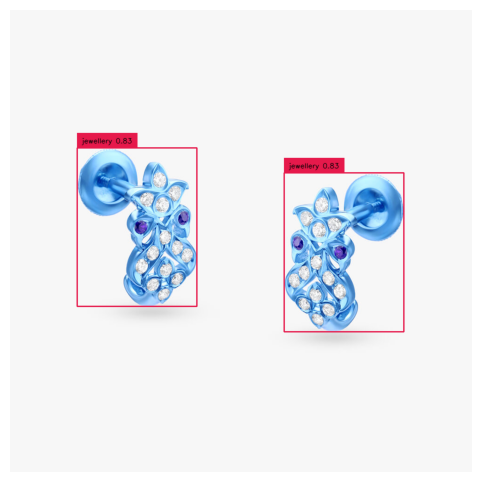

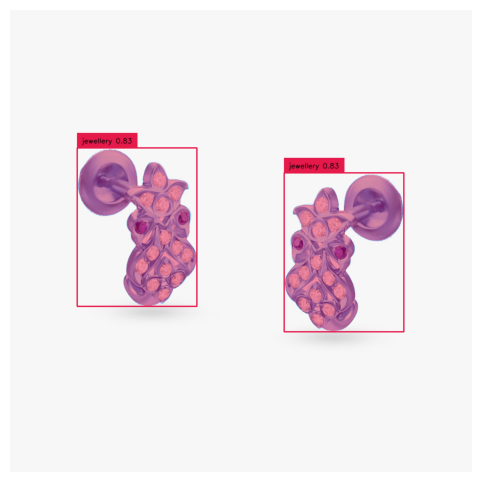

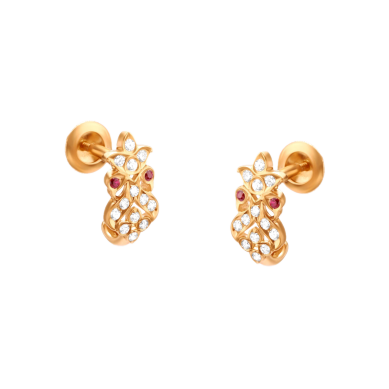

In [50]:
img_url = "https://www.tanishq.co.in/dw/image/v2/BKCK_PRD/on/demandware.static/-/Sites-Tanishq-product-catalog/default/images/hi-res/51O2CSHABAEA28_1.jpg"
output_path = "/content/Extracted_Jewellery.png"
modified_jewel_extract_pipeline(img_url, output_path)

# The main loop to read image urls one by one and storing them

In [ ]:
# for idx, (product_id, image_url) in enumerate(testgold):
#   try:
#     print(f"Processing {idx+1}/{len(testgold)}: {product_id} -> {image_url}")
#     response = requests.get(image_url)
#     image_data = response.content
#     if response.status_code != 200:
#       print("-------------------Failed to download image.-------------------------")
#     else:
#       with tempfile.NamedTemporaryFile(suffix=".jpg", delete=False) as tmp_file:
#         tmp_file.write(image_data)
#         tmp_path = tmp_file.name

#         # Step 3: Run your pipeline with the image path
#         result_img = gold_extract_pipeline_test(tmp_path)

#         # Step 4: Save the result if valid
#         if result_img is not None:
#             filename = f"Extracted_Jewel_{product_id}.png"
#             result_img.save(os.path.join(output_dir, filename))
#             print(f"Saved: {output_dir} as: {filename}")
#         else:
#             print("No result generated.")

#         # Step 5: Delete the temp file
#         os.remove(tmp_path)

#   except Exception as e:
#     print(f"Error processing {product_id}: {e}")

# Delete all files present in a folder

In [ ]:
# # Delete all file from the Extracted_Watch folder
# import os

# folder_path = "/content/Extracted_Jewellery"

# for filename in os.listdir(folder_path):
#     file_path = os.path.join(folder_path, filename)

#     # Delete only files, skip folders
#     if os.path.isfile(file_path):
#         os.remove(file_path)

# Check number of files in a directory

In [ ]:
# # Check the number of files in the output directory
# import glob

# folder_path = "/content/Extracted_Bags"

# num_files = len(glob.glob(folder_path + "/*"))

# print(f"Number of files in the folder: {num_files}")

# Convert required directory in a zip file

In [ ]:
# # To convert the created folder into zip folder
# import shutil

# # Replace 'your_folder' with the actual folder name
# shutil.make_archive('/content/Extracted_Bags', 'zip', '/content/Extracted_Bags')

# Download the zip file in local file system

In [ ]:
# # To download the files in local system
# from google.colab import files
# files.download('/content/Extracted_Bags.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>